# Learning To Rank Currency Investments

## 1 Generate Time Series Data

Data Feeding for Training (and Updating) based on [Python YFinance API](https://github.com/ranaroussi/yfinance). Complete

In [1]:
# Cloud/Local Env Handling
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  PATH = "/content/drive/MyDrive/"
  PATH_INSTALL_REQUIREMENTS = "/content/drive/MyDrive/Colab\ Notebooks/requirements.txt"  
  import sys
  sys.path.append(PATH + "Colab Notebooks")
except:  
  import os
  if os.name=="nt":
    PATH_INSTALL_REQUIREMENTS = os.getcwd() + "\\requirements.txt"  
  else: #Unix system
    PATH_INSTALL_REQUIREMENTS = os.getcwd() + "/requirements.txt"  
  PATH=""

In [5]:
CONFIG_FILE = "./config.yaml"

In [3]:
def config():
        with open(CONFIG_FILE,"r") as configfile:
            cfg=yaml.safe_load(configfile)
                
        # parsing of yaml configuration file
        country_list = [cfg["currencies"][block] for block in cfg["currencies"]]
        # flattening list of lists
        country_list = [land for blocklist in country_list for land in blocklist]
        
        return {
            "codes": country_list,                                  # country code ISO4217
            "ticker": ["EUR"+code+"=X" for code in country_list]    # Y! Finance API ticker
        }

In [6]:
data = yf.download(
    config()["ticker"]
)["Close"]

[*********************100%***********************]  21 of 21 completed


In [7]:
data.head()

,EURAUD=X,EURBRL=X,EURCAD=X,EURCHF=X,EURCNY=X,EURDKK=X,EURGBP=X,EURHKD=X,EURINR=X,EURJPY=X,...,EURMXN=X,EURNOK=X,EURNZD=X,EURRUB=X,EURSEK=X,EURSGD=X,EURTRY=X,EURTWD=X,EURUSD=X,EURZAR=X
Date,,,,,,,,,,,,,,,,,,,,,
1998-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.4447,NaN,NaN,NaN,NaN,NaN
1998-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.4284,NaN,NaN,NaN,NaN,NaN
1998-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.3853,NaN,NaN,NaN,NaN,NaN
1998-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.3561,NaN,NaN,NaN,NaN,NaN
1998-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.3244,NaN,NaN,NaN,NaN,NaN


In [8]:
data.dropna(how="any",inplace=True)

In [9]:
data.shape # untidy dimensions

(4354, 21)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4354 entries, 2006-03-28 to 2023-02-01
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EURAUD=X  4354 non-null   float64
 1   EURBRL=X  4354 non-null   float64
 2   EURCAD=X  4354 non-null   float64
 3   EURCHF=X  4354 non-null   float64
 4   EURCNY=X  4354 non-null   float64
 5   EURDKK=X  4354 non-null   float64
 6   EURGBP=X  4354 non-null   float64
 7   EURHKD=X  4354 non-null   float64
 8   EURINR=X  4354 non-null   float64
 9   EURJPY=X  4354 non-null   float64
 10  EURKRW=X  4354 non-null   float64
 11  EURMXN=X  4354 non-null   float64
 12  EURNOK=X  4354 non-null   float64
 13  EURNZD=X  4354 non-null   float64
 14  EURRUB=X  4354 non-null   float64
 15  EURSEK=X  4354 non-null   float64
 16  EURSGD=X  4354 non-null   float64
 17  EURTRY=X  4354 non-null   float64
 18  EURTWD=X  4354 non-null   float64
 19  EURUSD=X  4354 non-null   float64
 20  EURZAR=X  43

In [11]:
data.columns = [ticker.replace("EUR","").replace("=X","") for ticker in data.columns.tolist()]
data.head()

,AUD,BRL,CAD,CHF,CNY,DKK,GBP,HKD,INR,JPY,...,MXN,NOK,NZD,RUB,SEK,SGD,TRY,TWD,USD,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-28,1.6993,2.6648,1.4037,1.57180,9.2724,7.4613,0.6888,9.3152,53.549999,141.419998,...,12.947,7.9434,1.9850,33.410999,9.3762,1.9469,1.6320,39.275002,1.201100,7.5463
2006-03-29,1.7019,2.6592,1.4101,1.57520,9.6227,7.4616,0.6932,9.3334,53.618999,141.660004,...,13.126,7.9763,1.9869,33.412998,9.4275,1.9503,1.6330,39.165001,1.203094,7.5409
2006-03-30,1.7006,2.6637,1.4082,1.57710,9.2881,7.4621,0.6963,9.4380,54.074001,142.679993,...,13.191,7.9651,1.9809,33.597000,9.4021,1.9670,1.6259,39.255001,1.216797,7.4991
2006-03-31,1.6897,2.6207,1.4140,1.58010,9.6896,7.4623,0.6969,9.3988,53.955002,142.639999,...,13.150,7.9363,1.9658,33.602001,9.4430,1.9322,1.6179,39.424999,1.211504,7.4496
2006-04-03,1.6985,2.5979,1.4213,1.58285,9.7035,7.4623,0.6975,9.4163,54.037998,142.949997,...,13.137,7.8690,2.0023,33.638000,9.3950,1.9611,1.6174,39.145000,1.213902,7.3973


In [12]:
inverse_data = 1/data 

In [13]:
%whos DataFrame

Variable       Type         Data/Info
-------------------------------------
data           DataFrame                    AUD     B<...>n[4354 rows x 21 columns]
inverse_data   DataFrame                     AUD     <...>n[4354 rows x 21 columns]


### Untidy Raw Prices Dataset dumps (as of 2022 End Of Year)

In [53]:
# 1. direct fx rate (currency units corresponding to 1 €)
data.to_csv(PATH + "fx_data/FX_rates.csv") 
# 2. inverse fx rate (1 currency unit in € terms -> wealth in €)
inverse_data.to_csv(PATH + "fx_data/inverse_FX_rates.csv")

### Raw Prices Dataset dumps in tidy format

In [41]:
def to_tidy(untidy_data, value_name_="fx_rate"):
    return (
        pd.melt(
            untidy_data,
            var_name="code",
            value_name=value_name_,
            ignore_index=False
        ).reset_index().sort_values(by=["Date","code"])
    )

In [80]:
tidy_data = to_tidy(data)
tidy_inverse_data = to_tidy(inverse_data, value_name_="inverse_fx_rate")

In [81]:
# 1. direct fx rate
tidy_data.to_csv(
    PATH+"fx_data/tidy_FX_rates.csv",
    index=False
)

In [82]:
# 2. inverse fx rate
tidy_inverse_data.to_csv(
    PATH+"fx_data/tidy_inverse_FX_rates.csv",
    index=False
)

In [83]:
tidy_data.dtypes

Date       datetime64[ns]
code               object
fx_rate           float64
dtype: object

In [84]:
tidy_data.isnull().sum()

Date       0
code       0
fx_rate    0
dtype: int64

##### Conclusion 
We can conclude exactly the same for the inverse fx rates. Therefore for raw prices we have several `tidy` sets:

* Numerical data without null values.
* Sorted data.
* Coherent names by columns.
* No duplicates
* Every Row represents individual observations.
* Every Column represents separate variables.


### Brief EDA Analysis for Raw Prices



In [85]:
tidy_inverse_data.describe()

,inverse_fx_rate
count,91392.000000
mean,0.323455
std,0.351110
min,0.000507
25%,0.046481
50%,0.127035
75%,0.622651
max,1.526951


In [18]:
inverse_data.describe().loc["min",:].sort_values() # All the FX Quotes Seem to Be consistent (KRW, JPY are "little" currencies)

KRW    0.000507
JPY    0.005898
RUB    0.006854
INR    0.010908
TWD    0.020973
MXN    0.036624
ZAR    0.048040
TRY    0.048676
NOK    0.079395
HKD    0.080274
SEK    0.085605
CNY    0.089539
DKK    0.133754
BRL    0.143697
NZD    0.392188
SGD    0.458463
AUD    0.480469
CAD    0.581463
CHF    0.595415
USD    0.625470
GBP    1.021450
Name: min, dtype: float64

In [21]:
# The Maximum Quote of Japanes Yen through
1/inverse_data.describe().loc["min",:].loc["JPY"]

169.5500030517578

In [23]:
def norm_px_tsplot(fx_data, currencies=["USD","CNY"], **kwargs):
    (fx_data/fx_data.iloc[0])[currencies].plot(
        figsize=(21,9),    
    );
    ax = plt.gca()
    
    ax.set_ylabel("Inverse FX rate")
    ax.title.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    ax.xaxis.label.set_fontsize(14)
    ax.grid()

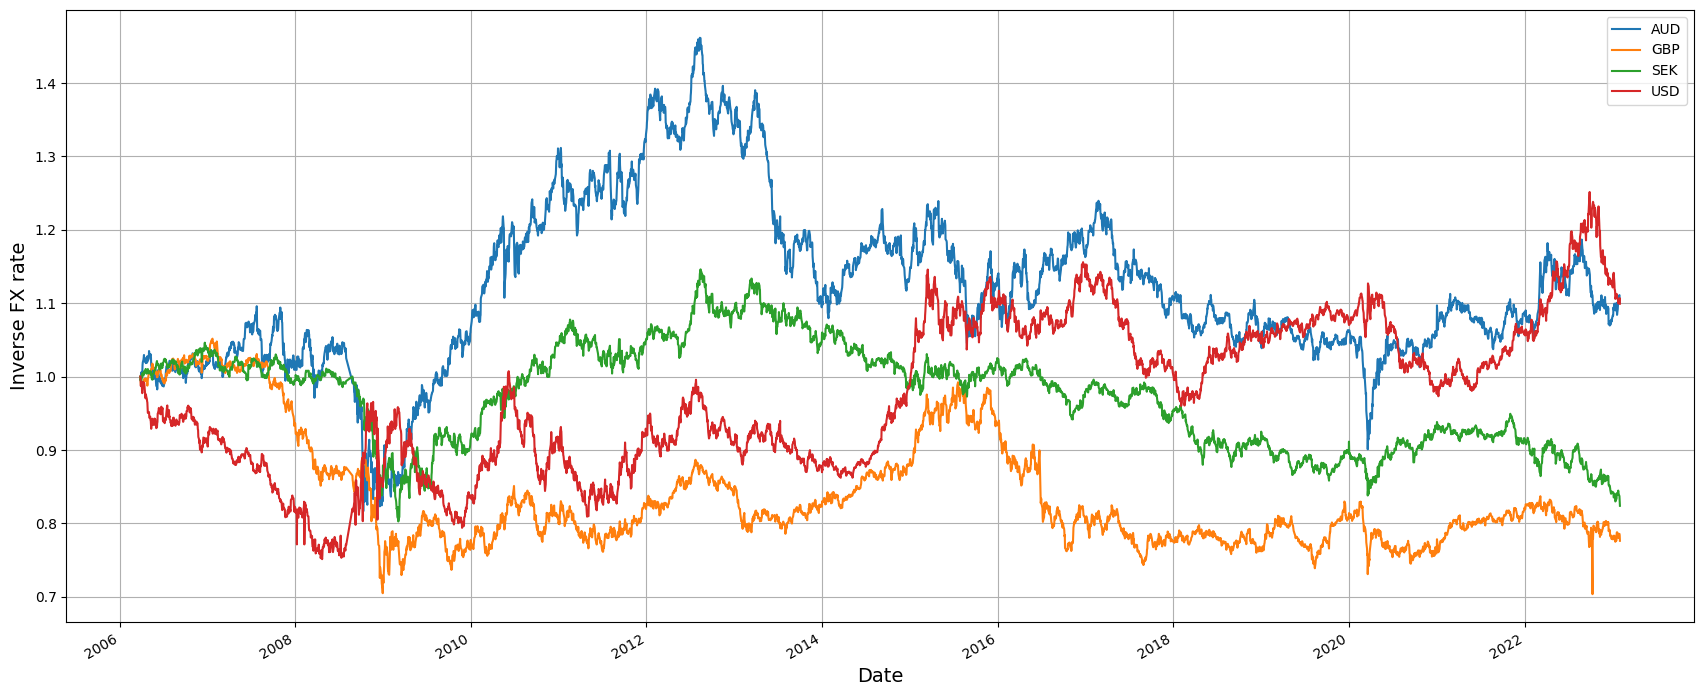

In [24]:
# Plotting Normalized Prices as an Example
symbols = ["AUD","GBP","SEK","USD"]
norm_px_tsplot(inverse_data, symbols)

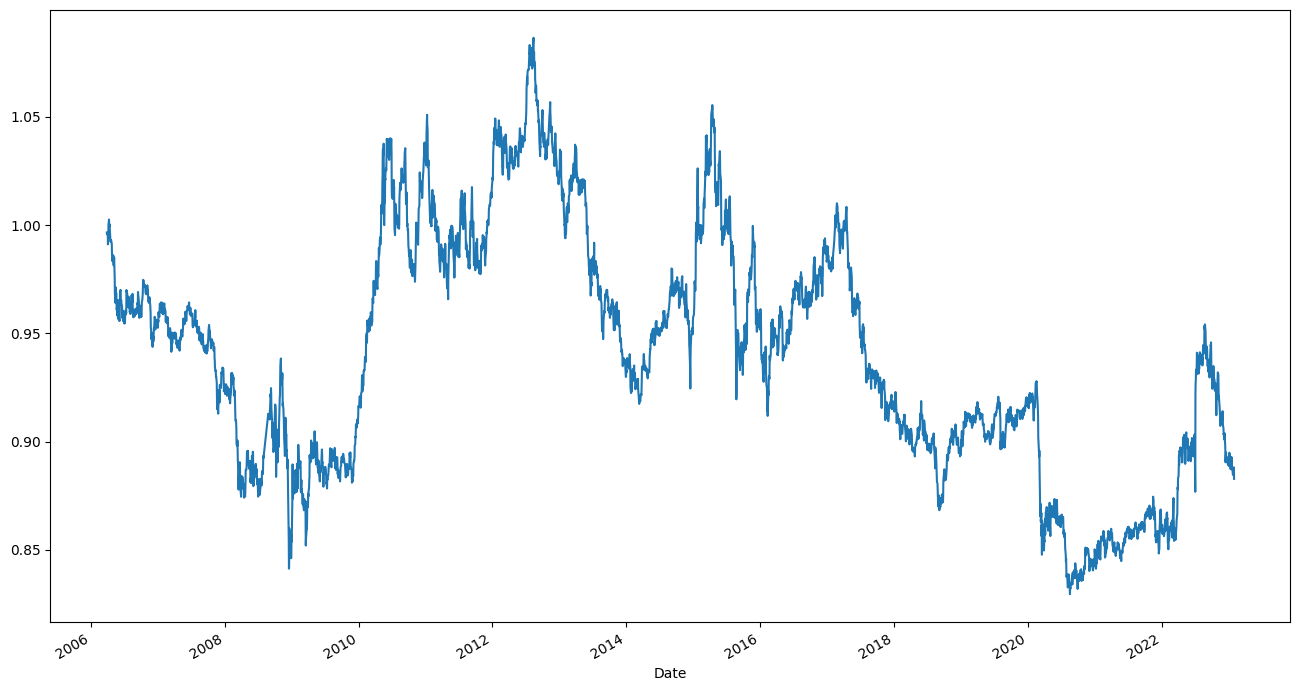

In [25]:
# Solomonic Portfolio of Currencies (check with fx_shinyvisor)
(1+inverse_data.pct_change().mean(axis=1)).cumprod().plot(figsize=(16,9));

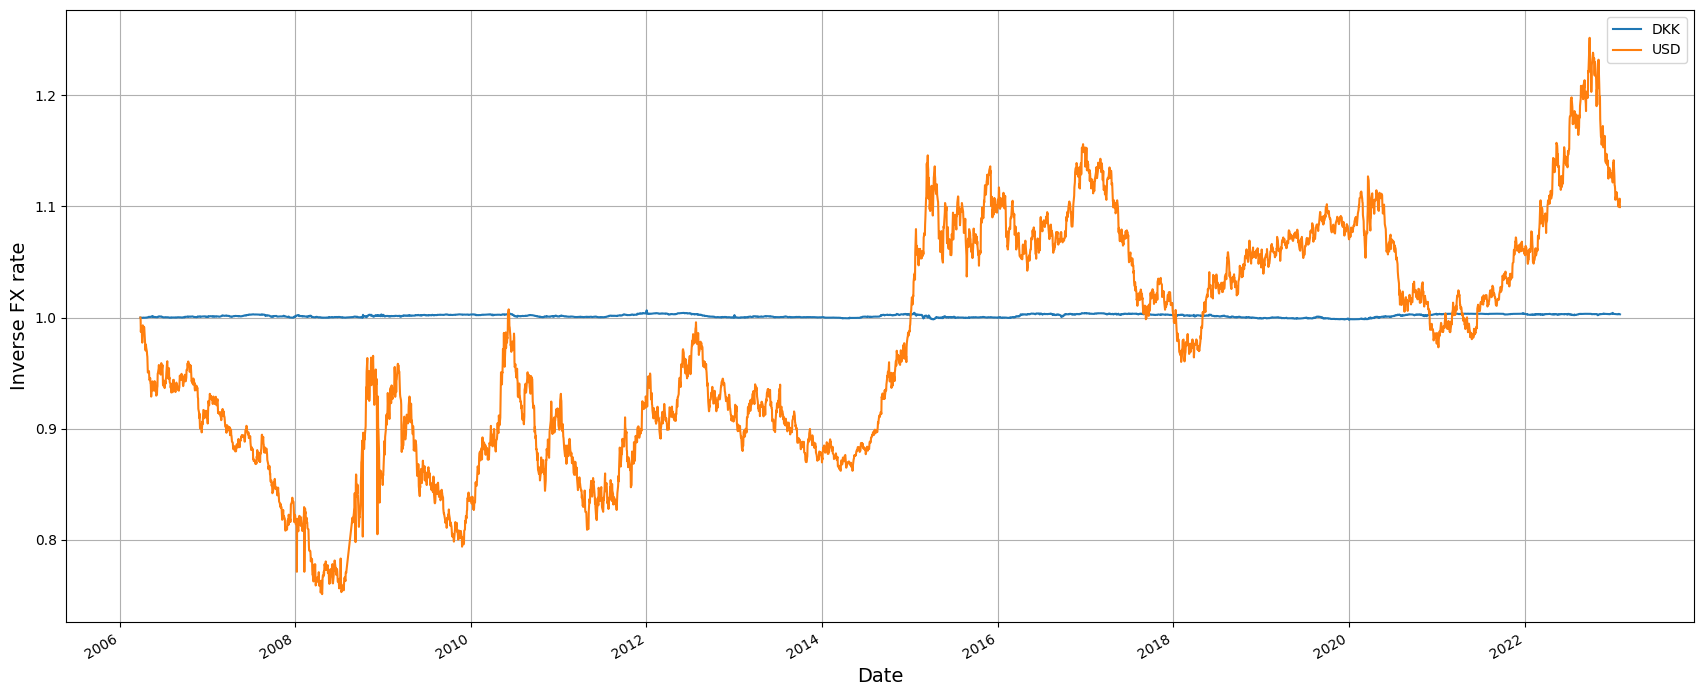

In [29]:
## Manual Excludes By Using Expert/Economic Criteria.
# 1. DKK: strongly pegged to EUR (redundancy)
symbols = ["DKK","USD"]
norm_px_tsplot(inverse_data, symbols) # look at the scale of variations of DKK in comparison to $

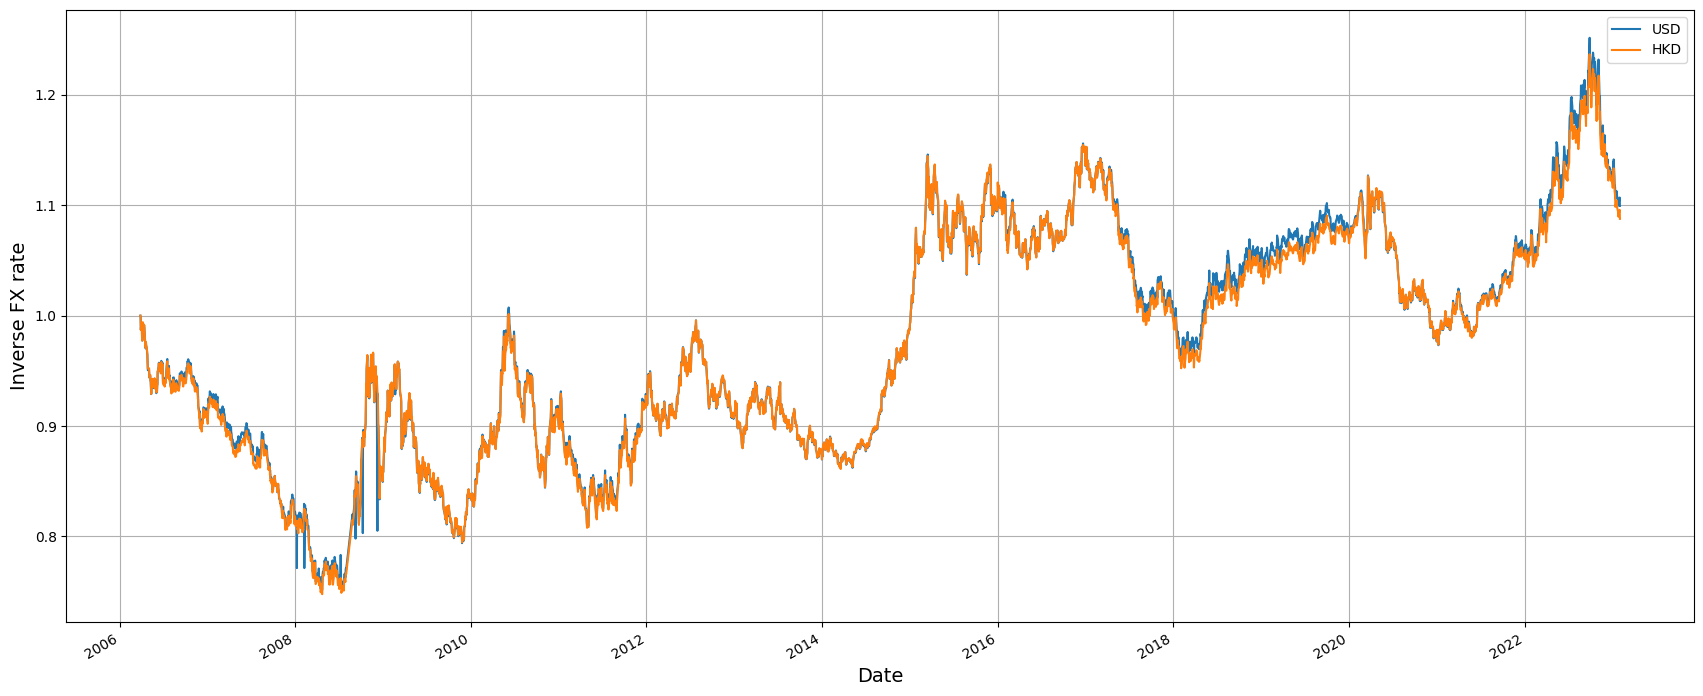

In [28]:
# 2. HKD: strongly pegged to USD
norm_px_tsplot(inverse_data, ["USD","HKD"])

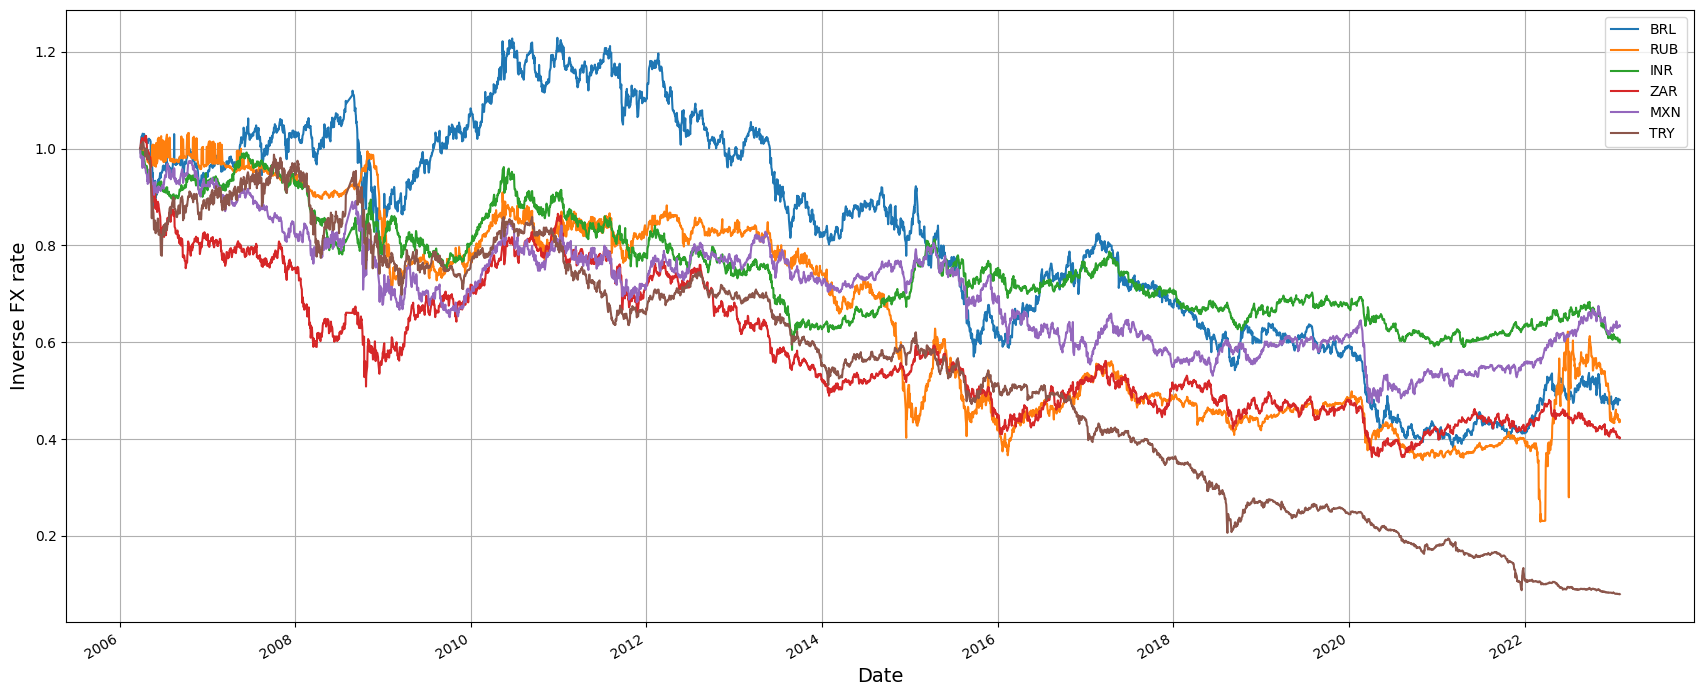

In [35]:
# 3. Exlusion of High Volatile currencies (development countries and BRICS with the exception of Chinese Yuan)
BRICS = ["BRL","RUB","INR","ZAR"]
devel_countries = ["MXN","TRY"]
norm_px_tsplot(inverse_data, BRICS+devel_countries)

In [31]:
pegs = ["HKD","DKK"]

In [36]:
inverse_data_filtered = inverse_data.drop(
    columns=BRICS+devel_countries+pegs
)

In [38]:
inverse_data_filtered.head()

,AUD,CAD,CHF,CNY,GBP,JPY,KRW,NOK,NZD,SEK,SGD,TWD,USD
Date,,,,,,,,,,,,,
2006-03-28,0.588478,0.712403,0.636213,0.107847,1.451800,0.007071,0.000860,0.125891,0.503778,0.106653,0.513637,0.025461,0.83257
2006-03-29,0.587579,0.709170,0.634840,0.103921,1.442585,0.007059,0.000864,0.125371,0.503297,0.106073,0.512742,0.025533,0.83119
2006-03-30,0.588028,0.710126,0.634075,0.107665,1.436163,0.007009,0.000860,0.125548,0.504821,0.106359,0.508388,0.025474,0.82183
2006-03-31,0.591821,0.707214,0.632871,0.103203,1.434926,0.007011,0.000856,0.126003,0.508699,0.105899,0.517545,0.025365,0.82542
2006-04-03,0.588755,0.703581,0.631772,0.103056,1.433692,0.006995,0.000865,0.127081,0.499426,0.106440,0.509918,0.025546,0.82379


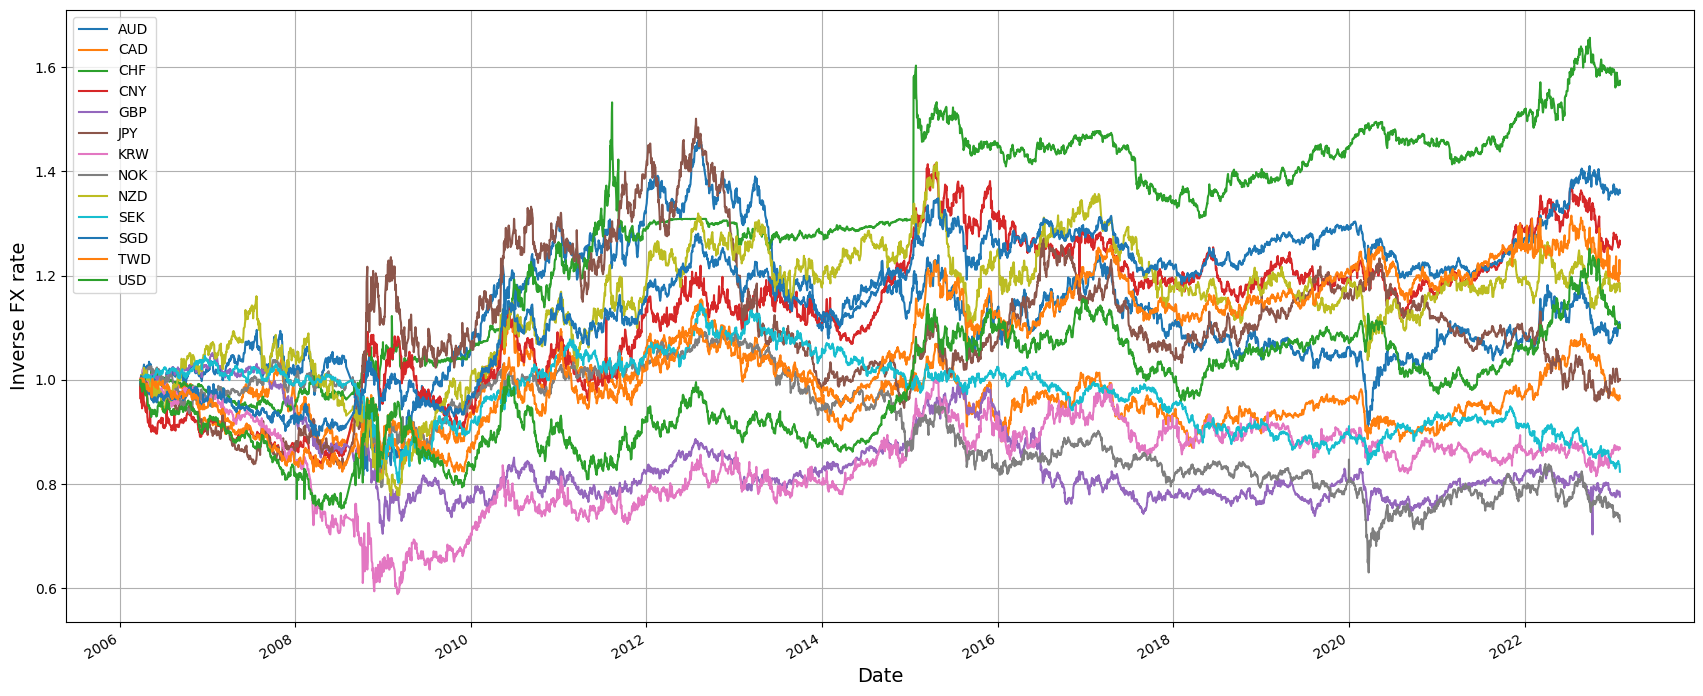

In [39]:
norm_px_tsplot(inverse_data_filtered, inverse_data_filtered.columns.tolist())

In [42]:
to_tidy(
    inverse_data_filtered, 
    value_name_="inverse_fx_rate").to_csv(
        "fx_data/tidy_inverse_FX_rates.csv",
        index=False
    )
    
to_tidy(
    data.drop(columns=BRICS+devel_countries+pegs)
    ).to_csv(
        "fx_data/tidy_FX_rates.csv",
        index=False
    )   

## 2 Adding Target (relevances)

Daily relevances based on one-step ahead daily returns

In [50]:
inverse_data.pct_change()

,AUD,BRL,CAD,CHF,CNY,DKK,GBP,HKD,INR,JPY,...,MXN,NOK,NZD,RUB,SEK,SGD,TRY,TWD,USD,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-29,-0.001528,0.002106,-0.004539,-0.002158,-0.036403,-0.000040,-0.006347,-0.001950,-0.001287,-0.001694,...,-0.013637,-0.004125,-0.000956,-0.000060,-0.005442,-0.001743,-0.000612,0.002809,-0.001658,0.000716
2006-03-30,0.000764,-0.001689,0.001349,-0.001205,0.036025,-0.000067,-0.004452,-0.011083,-0.008414,-0.007149,...,-0.004928,0.001406,0.003029,-0.005477,0.002702,-0.008490,0.004367,-0.002293,-0.011261,0.005574
2006-03-31,0.006451,0.016408,-0.004102,-0.001899,-0.041436,-0.000027,-0.000861,0.004171,0.002206,0.000280,...,0.003118,0.003629,0.007681,-0.000149,-0.004331,0.018011,0.004945,-0.004312,0.004368,0.006645
2006-04-03,-0.005181,0.008776,-0.005136,-0.001737,-0.001432,0.000000,-0.000860,-0.001858,-0.001536,-0.002169,...,0.000990,0.008553,-0.018229,-0.001070,0.005109,-0.014737,0.000309,0.007153,-0.001975,0.007070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26,0.005545,0.009878,-0.003592,0.002516,-0.002407,-0.000040,0.003410,-0.002638,-0.002102,0.004620,...,-0.002593,-0.005453,-0.004542,0.000056,-0.002682,0.002848,-0.003860,-0.002393,-0.003103,0.001582
2023-01-27,0.003448,0.004062,0.007424,-0.000638,0.002073,0.000262,0.002815,0.002709,0.003531,-0.001789,...,0.002012,0.004946,0.003605,-0.001234,-0.003163,0.002926,0.002518,0.003789,0.002534,-0.000614
2023-01-30,0.001223,-0.006199,0.003084,0.001319,0.002431,-0.000105,0.000833,0.001877,0.001390,0.001636,...,0.003514,0.002176,0.003228,-0.015189,-0.003032,0.001521,0.002414,0.031023,0.002113,0.000105


In [ ]:
ratings = inverse_fx_data.pct_change().rank(axis=1).shift(-1)

In [ ]:
ratings

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,5.0,3.0,7.0,8.0,6.0,2.0,9.0,4.0,10.0,1.0
2003-12-02,8.0,1.0,5.0,6.0,2.0,7.0,10.0,4.0,9.0,3.0
2003-12-03,6.0,1.0,4.0,3.0,2.0,9.0,10.0,7.0,5.0,8.0
2003-12-04,3.0,4.0,10.0,6.0,5.0,8.0,7.0,1.0,9.0,2.0
2003-12-05,10.0,9.0,8.0,5.0,4.0,2.0,1.0,6.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,5.0,4.0,3.0,7.0,8.0,6.0,1.0,2.0,9.0,10.0
2022-09-27,2.0,8.0,10.0,5.0,3.0,6.0,7.0,1.0,4.0,9.0
2022-09-28,6.0,3.0,9.0,7.0,5.0,2.0,4.0,10.0,8.0,1.0


In [ ]:
best_signal = (ratings==10.).shift(1)
worst_signal = (ratings==1.).shift(1)

In [ ]:
best_signal.head()

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,False,False,False,False,False,False,False,False,True,False
2003-12-03,False,False,False,False,False,False,True,False,False,False
2003-12-04,False,False,False,False,False,False,True,False,False,False
2003-12-05,False,False,True,False,False,False,False,False,False,False


In [ ]:
fx_returns_daily = inverse_fx_data.pct_change()
fx_returns_daily.head()

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,-0.004362,-0.004722,-0.002378,-0.000229,-0.003295,-0.006543,0.000061,-0.004601,0.000799,-0.010254
2003-12-03,0.003893,-0.005648,-0.001091,0.000040,-0.003853,0.001371,0.005605,-0.002775,0.003990,-0.002805
2003-12-04,0.001767,-0.004422,0.001221,0.000107,-0.001567,0.003824,0.004231,0.002246,0.001228,0.003479
2003-12-05,-0.007859,-0.002960,0.003612,-0.000013,-0.001707,0.000229,0.000161,-0.008746,0.002002,-0.008698


In [ ]:
fx_returns_daily[best_signal].head()

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000799,NaN
2003-12-03,NaN,NaN,NaN,NaN,NaN,NaN,0.005605,NaN,NaN,NaN
2003-12-04,NaN,NaN,NaN,NaN,NaN,NaN,0.004231,NaN,NaN,NaN
2003-12-05,NaN,NaN,0.003612,NaN,NaN,NaN,NaN,NaN,NaN,NaN


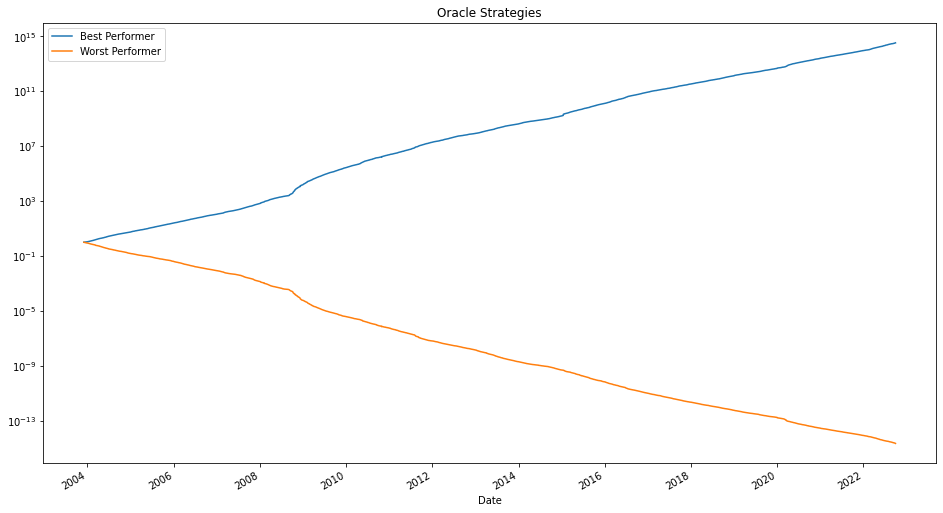

In [ ]:
plot_args = {
    "figsize": (16,9),
    "legend": True
}

(1+fx_returns_daily[best_signal].mean(axis=1,skipna=True)).cumprod().rename("Best Performer").plot(**plot_args, title="Oracle Strategies");
(1+fx_returns_daily[worst_signal].mean(axis=1,skipna=True)).cumprod().rename("Worst Performer").plot(**plot_args);
plt.semilogy();

In [ ]:
score_returns = pd.melt(
    ratings,
    var_name="symbols",
    value_name="score_return",
    ignore_index=False
).reset_index(
).sort_values(by=["Date","symbols"])

In [ ]:
score_returns.dropna(inplace=True)

In [ ]:
score_returns.rename(columns={"score_return": "rank"}, inplace=True)

In [ ]:
score_returns= score_returns.astype({"rank": int})

In [ ]:
score_returns.head()

,Date,symbols,rank
0,2003-12-01,AUD,5
4881,2003-12-01,CAD,3
9762,2003-12-01,CHF,7
14643,2003-12-01,DKK,8
19524,2003-12-01,GBP,6


In [ ]:
score_returns.to_csv(
    PATH + "fx_data/FX_quantized_returns.csv",
    index=False
)

## 3 Return-Based Features

Checkpoint: reset kernel [rerun Jupyter cell](#scrollTo=Fk9Gp-VT1riu&line=10&uniqifier=1) and then continue.

In [ ]:
# Checkpoint: Reset Kernel if needed
plot_args = {
    "figsize": (16,9),
    "legend": True
}

In [ ]:
inverse_fx_rates=pd.read_csv(
    PATH + "fx_data/inverse_FX_rates.csv",
    index_col = "Date",
    parse_dates = ["Date"]
)

In [ ]:
# Constructing Momentum Features (Raw Cumulative Returns Over Some Past Horizons)
days = [5,10,21,63]
feature_names = ["MOM1W","MOM2W","MOM1M","MOM3M"]
features = dict()

for f, d in zip(feature_names, days):
    features[f] = inverse_fx_rates.pct_change(d)

<AxesSubplot:xlabel='Date'>

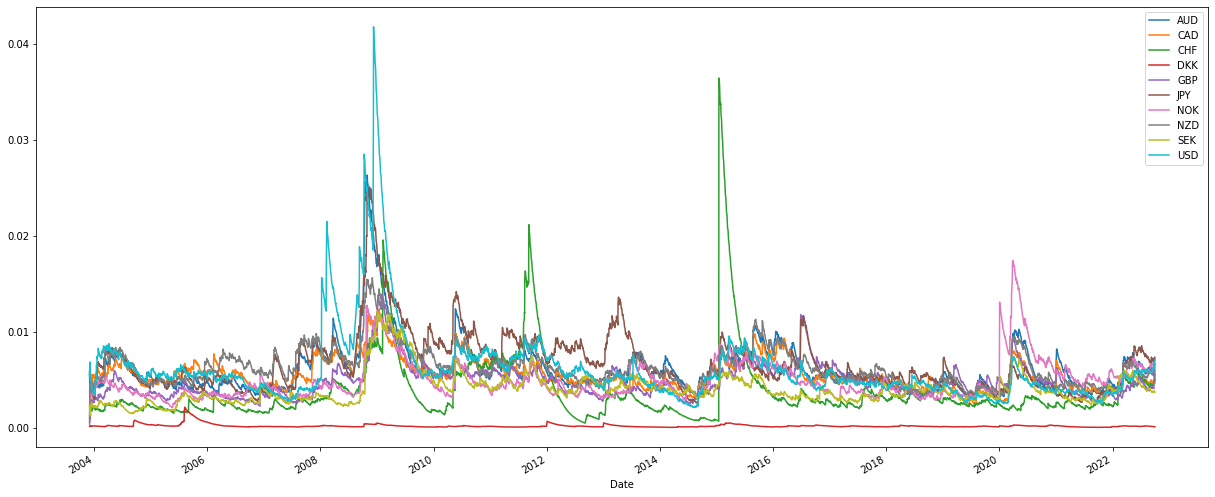

In [ ]:
# 3M EWM Volatility as daily VOL estimator (GARCH estimators can also be used)
inverse_fx_rates.pct_change().ewm(span=63).std().plot(figsize=(21,9))

In [ ]:
# Adding Year-Scaled Daily Volatility Stimator based on 3M EWM Volatility
features["EWVOL3M"] = np.sqrt(252)*inverse_fx_rates.pct_change().ewm(span=63).std()

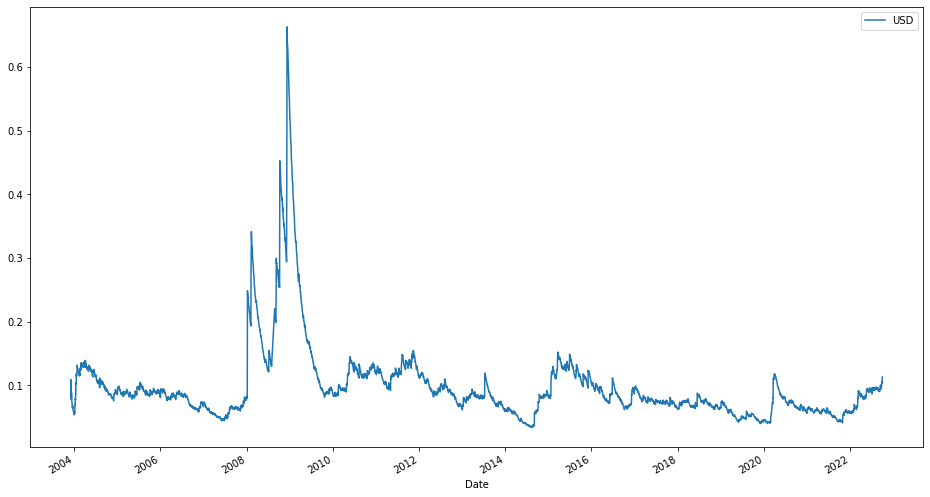

In [ ]:
features["EWVOL3M"]["USD"].plot(**plot_args);

In [ ]:
features.keys()

dict_keys(['MOM1W', 'MOM2W', 'MOM1M', 'MOM3M', 'EWVOL3M'])

In [ ]:
# Adding Returns Scaled by the Corresponding Volatility-Period estimate
periods = [1,3,5,10,21]
scaled_feature_names = ["SRET1D","SRET3D","SRET1W","SRET2W","SRET1M"]

for f, d in zip(scaled_feature_names, periods):
    features[f] = np.sqrt(252/d)*inverse_fx_rates.pct_change(d)/features["EWVOL3M"]

## 4 PMs-Based Features

### 4.1 Sharpe Ratios

In [ ]:
inverse_fx_rates.pct_change()

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,-0.004362,-0.004722,-0.002378,-0.000229,-0.003295,-0.006543,0.000061,-0.004601,0.000799,-0.010254
2003-12-03,0.003893,-0.005648,-0.001091,0.000040,-0.003853,0.001371,0.005605,-0.002775,0.003990,-0.002805
2003-12-04,0.001767,-0.004422,0.001221,0.000107,-0.001567,0.003824,0.004231,0.002246,0.001228,0.003479
2003-12-05,-0.007859,-0.002960,0.003612,-0.000013,-0.001707,0.000229,0.000161,-0.008746,0.002002,-0.008698
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,-0.001645,0.007587,0.008827,-0.000054,-0.026418,0.007180,-0.002558,-0.002674,-0.005027,0.015648
2022-09-27,-0.002395,-0.002964,-0.003184,0.000039,0.004355,-0.000014,-0.011717,-0.006859,0.004433,0.006880
2022-09-28,-0.003045,0.001868,0.003332,-0.000039,-0.001420,0.001225,0.001547,-0.003093,-0.000744,0.002868


In [ ]:
# Thus, let us include 1M, 3M, 6M Sharpes as predictors
win = [21, 63, 126]
isharpe_names = ["ISR1M", "ISR3M", "ISR6M"]

for w, name in zip(win, isharpe_names):
    features[name] = inverse_fx_rates.pct_change().rolling(window=w).apply(pms.israelsen_sharpe_ratio)*np.sqrt(w/252)

<AxesSubplot:xlabel='Date'>

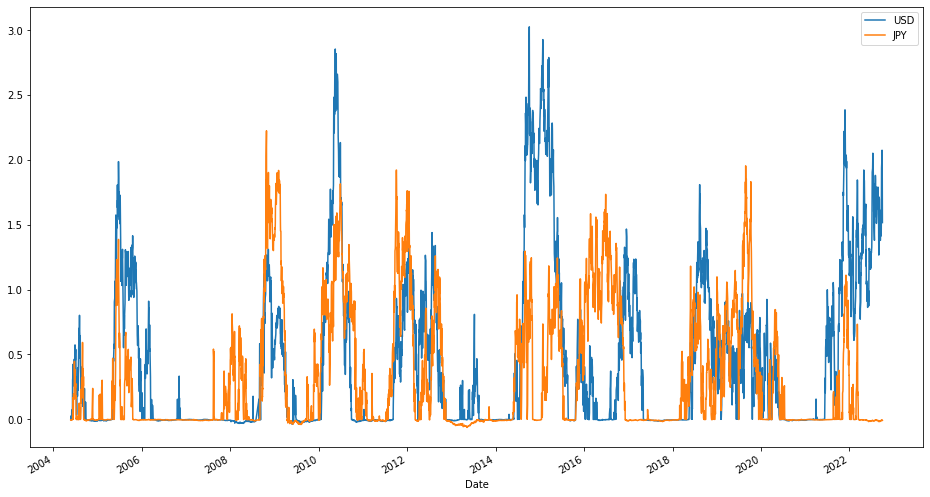

In [ ]:
features["ISR6M"][["USD","JPY"]].plot(**plot_args)

### 4.2 Skewness-Kurtosis Ratios

In [ ]:
# Thus, let us include 1M, 3M, 6M Sharpes as predictors
wins = [21, 63, 126]
names = ["SKR1M", "SKR3M", "SKR6M"]

for w, name in zip(wins, names):
    features[name] = inverse_fx_rates.pct_change().rolling(window=w).apply(pms.leon_sk_ratio)

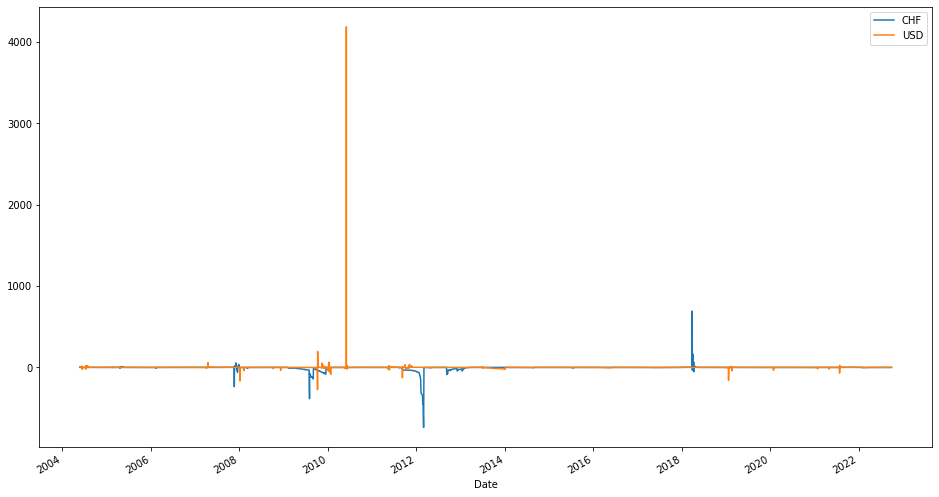

In [ ]:
features["SKR6M"][["CHF","USD"]].plot(**plot_args);

In [ ]:
currencies = inverse_fx_rates.columns.tolist()

In [ ]:
# Winsorizing SK Ratio
for feature in list(features.keys())[-3:]:
    features[feature] = features[feature].apply(winsorize, limits=(0.05,0.05))

<AxesSubplot:>

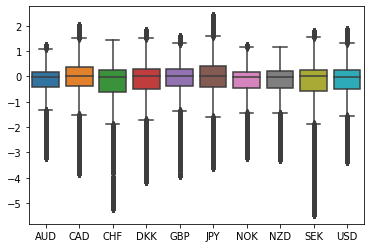

In [ ]:
sns.boxplot(
    data=features["SKR1M"][currencies],
)


<AxesSubplot:xlabel='Date'>

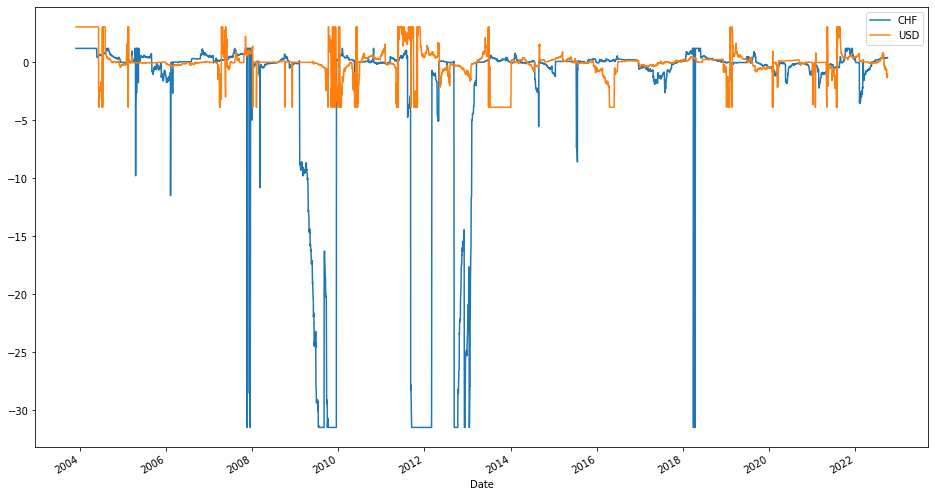

In [ ]:
features["SKR6M"][["CHF","USD"]].plot(**plot_args)

In [ ]:
# CheckPoint for Return-Based, Simple Ratio Features 
with open(PATH + "fx_data/FX_features_gcolab_pd135.pkl","wb+") as file:
    pickle.dump(features,file, protocol=pickle.HIGHEST_PROTOCOL)

### 4.3 PMs Based on Quantiles

In [ ]:
# Data preparation
with open(PATH + "fx_data/FX_features_gcolab_pd135.pkl","rb") as file:
    features = pickle.load(file)

In [ ]:
inverse_fx_rates = pd.read_csv(
    PATH + "fx_data/inverse_FX_rates.csv",
    index_col = "Date",
    parse_dates = ["Date"]
)

In [ ]:
features.keys()

dict_keys(['MOM1W', 'MOM2W', 'MOM1M', 'MOM3M', 'EWVOL3M', 'SRET1D', 'SRET3D', 'SRET1W', 'SRET2W', 'SRET1M', 'ISR1M', 'ISR3M', 'ISR6M', 'SKR1M', 'SKR3M', 'SKR6M'])

#### 4.3.1 VaR Ratio (Caporin-Lisi)

In [ ]:
from modules import performance_measures_helper as pms

In [ ]:
# Caporin-Lisi VaR Ratio
confidence_levels = [0.99, 0.95, 0.90, 0.80]
sample_periods = [21, 63, 126]

names = ["VARR1M","VARR3M", "VARR6M"]

for period, name in zip(sample_periods, names):
    for conf in confidence_levels:
        converted_conf = f"{int(100*conf):2}"
        print(f"Confidence Level "+converted_conf)        
        features[name+converted_conf] = inverse_fx_rates.pct_change().rolling(window=period).apply(
            pms.var_ratio,                                  
            kwargs={'quant': conf}
        )

Confidence Level 99
Confidence Level 95
Confidence Level 90
Confidence Level 80
Confidence Level 99
Confidence Level 95
Confidence Level 90
Confidence Level 80
Confidence Level 99
Confidence Level 95
Confidence Level 90
Confidence Level 80


In [ ]:
features.keys()

dict_keys(['MOM1W', 'MOM2W', 'MOM1M', 'MOM3M', 'EWVOL3M', 'SRET1D', 'SRET3D', 'SRET1W', 'SRET2W', 'SRET1M', 'ISR1M', 'ISR3M', 'ISR6M', 'SKR1M', 'SKR3M', 'SKR6M', 'VARR1M99', 'VARR1M95', 'VARR1M90', 'VARR1M80', 'VARR3M99', 'VARR3M95', 'VARR3M90', 'VARR3M80', 'VARR6M99', 'VARR6M95', 'VARR6M90', 'VARR6M80'])

#### 4.3.2 Rachev Ratio (Conditional VaR)

In [ ]:
confidence_levels = [0.99, 0.95, 0.90, 0.80]
sample_periods = [21, 63, 126]

names = ["RACHEV1M","RACHEV3M", "RACHEV6M"]

for period, name in zip(sample_periods, names):
    for conf in confidence_levels:
        converted_conf = f"{int(100*conf):2}"
        print(f"Confidence Level "+converted_conf)
        features[name+converted_conf] = inverse_fx_rates.pct_change().rolling(window=period).apply(
            pms.rachev_ratio,                                  
            kwargs={'alpha': conf}
        ).abs()

Confidence Level 99
Confidence Level 95
Confidence Level 90
Confidence Level 80
Confidence Level 99
Confidence Level 95
Confidence Level 90
Confidence Level 80
Confidence Level 99
Confidence Level 95
Confidence Level 90
Confidence Level 80


[]

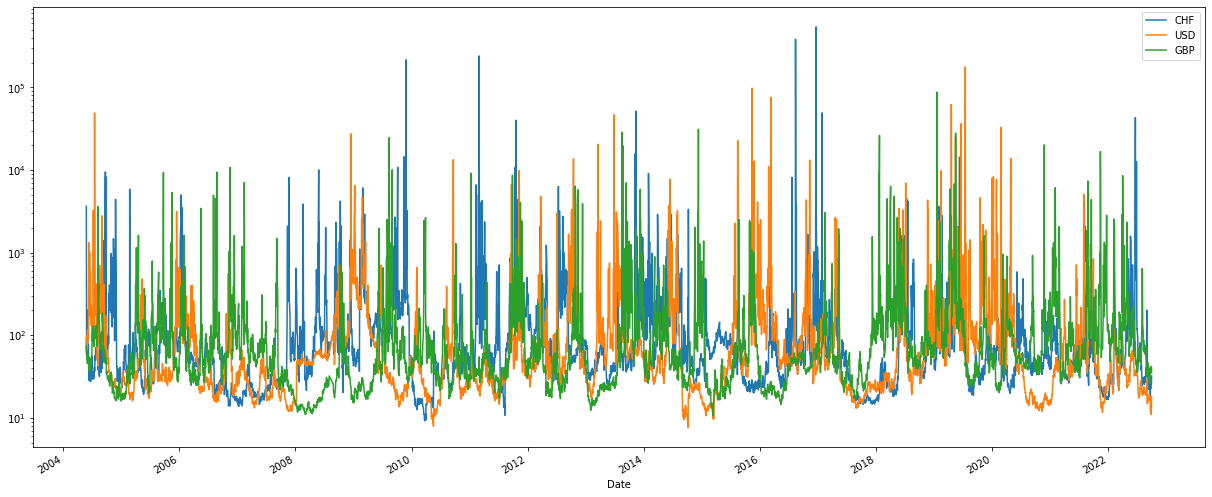

In [ ]:
features["RACHEV6M99"][["CHF","USD","GBP"]].plot(figsize=(21,9))
plt.semilogy()

[]

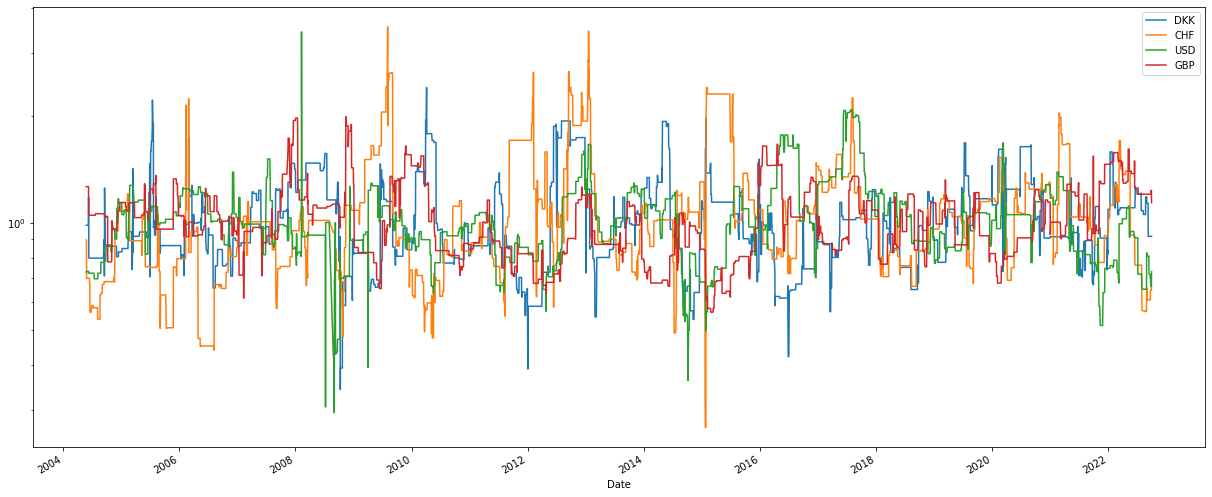

In [ ]:
features["VARR6M99"][["DKK","CHF","USD","GBP"]].plot(figsize=(21,9))
plt.semilogy()

In [ ]:
with open(PATH + "fx_data/FX_features_pd135_quantilePMs.pkl","wb+") as handle:
  pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 4.4 PMs based on LPMs

#### 4.4.1 Sortino Ratio

In [4]:
with open(PATH + "fx_data/FX_features_pd135_quantilePMs.pkl","rb+") as file:
  features = pickle.load(file)

In [8]:
inverse_fx_rates = pd.read_csv(
    PATH + "fx_data/inverse_FX_rates.csv",
    index_col="Date",
    parse_dates=["Date"]
)

In [9]:
sample_periods = [21, 63, 126]

names = ["SORTINO1M","SORTINO3M", "SORTINO6M"]

for period, name in zip(sample_periods, names):
  features[name] = inverse_fx_rates.pct_change().rolling(window=period).apply(
      pms.leon_sortino_ratio
  )

#### 4.4.2 Omega Ratio

In [10]:
names = ["OMEGA1M","OMEGA3M", "OMEGA6M"]

for period, name in zip(sample_periods, names):
  features[name] = inverse_fx_rates.pct_change().rolling(window=period).apply(
      pms.omega_ratio
  )

In [12]:
len(features.keys())

46

In [13]:
with open(PATH + "fx_data/FX_features_pd135_allPMs.pkl","wb+") as handle:
  pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)

## 5 Compiling All Features

In [16]:
features[f]

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0.996316,1.233726,1.378513,1.036287,0.754291,0.929020,0.855858,0.832008,0.790286,1.581658
2022-09-27,0.982682,1.215647,1.358799,1.033172,0.774841,0.939921,0.813501,0.816741,0.789716,1.601420
2022-09-28,0.928355,1.182193,1.345788,1.017155,0.742521,0.930688,0.781534,0.771504,0.784478,1.585821


In [17]:
lst_features = []

for f in features:
    feature = pd.melt(
        features[f].dropna(how="all"),
        var_name="symbols",
        value_name=f,
        ignore_index=False
    ).sort_values(by=["Date","symbols"])

    feature.reset_index(inplace=True)
    lst_features.append(feature)

In [18]:
lst_features[0]

,Date,symbols,MOM1W
0,2003-12-08,AUD,-0.003940
1,2003-12-08,CAD,-0.015777
2,2003-12-08,CHF,0.002648
3,2003-12-08,DKK,-0.000323
4,2003-12-08,GBP,-0.012631
...,...,...,...
48755,2022-09-30,JPY,-0.013828
48756,2022-09-30,NOK,-0.025115
48757,2022-09-30,NZD,-0.017141
48758,2022-09-30,SEK,-0.005453


In [19]:
#Allin 
from functools import reduce

features_merged = reduce(
    lambda left, right: pd.merge(
        left, right,
        on=["Date","symbols"],
        how="inner"),
        lst_features
  )

features_merged

,Date,symbols,MOM1W,MOM2W,MOM1M,MOM3M,EWVOL3M,SRET1D,SRET3D,SRET1W,...,RACHEV6M99,RACHEV6M95,RACHEV6M90,RACHEV6M80,SORTINO1M,SORTINO3M,SORTINO6M,OMEGA1M,OMEGA3M,OMEGA6M
0,2004-05-25,AUD,0.015731,-0.006082,-0.055614,-0.056316,0.122640,0.794805,0.270957,0.910624,...,58.866322,20.157627,10.345165,4.280637,-0.079603,-0.024478,-6.285969e-03,0.385849,0.720941,0.875331
1,2004-05-25,CAD,0.000904,-0.007593,-0.034287,0.007412,0.112732,-1.323725,-1.161080,0.056922,...,23.561574,10.452677,6.076980,3.183850,-0.043225,0.470260,-8.575954e-03,0.629543,1.050538,0.828748
2,2004-05-25,CHF,-0.004871,-0.000909,0.007079,0.023576,0.035568,-1.304436,-0.535555,-0.972269,...,3639.860705,21.719801,8.922454,4.076541,4.608029,4.215688,7.449488e-01,1.559042,1.463008,1.085825
3,2004-05-25,DKK,0.000148,0.000134,0.000094,0.001653,0.002823,-0.529057,-0.218269,0.371664,...,74.860526,16.525860,8.542702,4.150863,0.753529,3.150276,-1.595831e-07,1.098828,1.462902,0.995638
4,2004-05-25,GBP,0.013034,0.011086,-0.005693,0.000449,0.087013,0.546624,0.836331,1.063399,...,73.998659,84.569047,16.796542,5.520228,-0.004589,0.085334,1.711806e+00,0.898997,1.010222,1.217466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47545,2022-09-30,JPY,-0.013828,0.008650,-0.015004,-0.001733,0.116713,-1.713078,-1.636785,-0.841096,...,29.713701,11.730133,6.684602,3.437627,-0.017319,-0.000051,-8.237297e-03,0.791138,0.999108,0.880002
47546,2022-09-30,NOK,-0.025115,-0.030699,-0.047832,-0.024027,0.105945,-1.567972,-0.953833,-1.682903,...,21.663397,11.287347,6.736532,3.376912,-0.053072,-0.006932,-1.418737e-02,0.414838,0.867722,0.764384
47547,2022-09-30,NZD,-0.017141,-0.020903,-0.040241,-0.019437,0.085561,-1.530522,-0.824816,-1.422254,...,19.264163,10.789876,6.634187,3.452138,-0.036007,-0.005034,-1.143417e-02,0.349518,0.878612,0.754133
47548,2022-09-30,SEK,-0.005453,-0.019867,-0.020857,-0.015266,0.059063,-1.214404,-0.751035,-0.655429,...,25.331388,12.140380,7.345273,3.711804,-0.011847,-0.002648,-5.999875e-03,0.484508,0.857934,0.764439


In [21]:
features_merged.to_csv(
    PATH + "fx_data/20220930_FX_features.csv",
    index = False
)

## 6 Adding More Target Candidates (lagged ISR)

### 6.1 Quantized Format (Classifiers, LETOR)

In [25]:
features["ISR1M"]

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,-0.009567,-0.005167,0.387525,0.636078,-0.023110,-0.008446,-0.023586,-0.013558,-0.006750,0.876819
2022-09-27,-0.006666,-0.004190,0.329070,0.603238,-0.018811,-0.004843,-0.024583,-0.010460,-0.005800,0.973111
2022-09-28,-0.007101,-0.003002,0.704217,0.559852,-0.017418,-0.000087,-0.023743,-0.011234,-0.004025,1.335994


In [37]:
lagged_isr_score = features["ISR6M"].rank(axis=1).shift(-1)

In [45]:
buy_currency_signal = (lagged_isr_score==10).shift(1)

[]

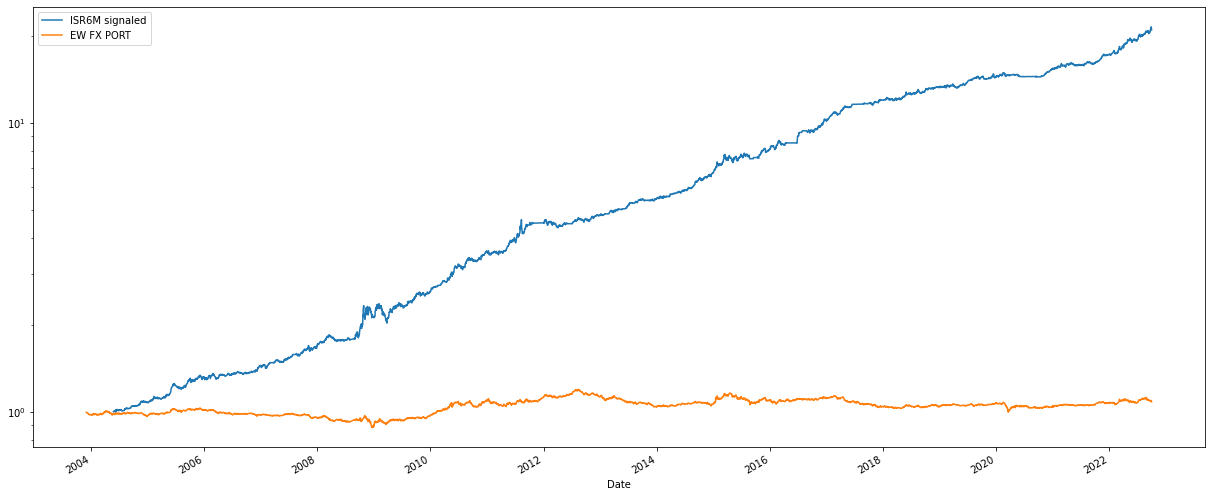

In [46]:
(1+inverse_fx_rates.pct_change()[buy_currency_signal].mean(axis=1,skipna=True)).cumprod().rename("ISR6M signaled").plot(
    figsize=(21,9), 
    legend=True
)
(1+inverse_fx_rates.pct_change().mean(axis=1,skipna=True)).cumprod().rename("EW FX PORT").plot(legend=True)
plt.semilogy()

<AxesSubplot:xlabel='Date'>

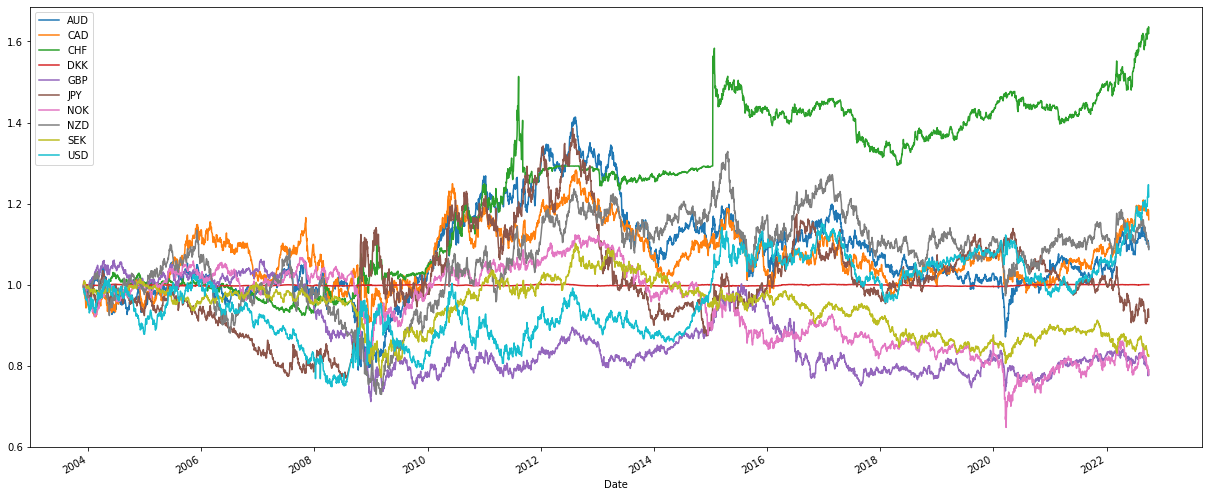

In [48]:
(1+inverse_fx_rates.pct_change()).cumprod().plot(figsize=(21,9),legend=True)

In [50]:
isr_features = ["ISR1M", "ISR3M", "ISR6M"]

lst_targets = []

for f in isr_features:
    feature = pd.melt(
        features[f].rank(axis=1).shift(-1).dropna(how="all"),
        var_name="symbols",
        value_name=f,
        ignore_index=False
    ).sort_values(by=["Date","symbols"])

    feature.reset_index(inplace=True)
    lst_targets.append(feature)


In [52]:
lst_targets[-1]

,Date,symbols,ISR6M
0,2004-05-24,AUD,3.0
1,2004-05-24,CAD,1.0
2,2004-05-24,CHF,9.0
3,2004-05-24,DKK,8.0
4,2004-05-24,GBP,10.0
...,...,...,...
47545,2022-09-29,JPY,3.0
47546,2022-09-29,NOK,1.0
47547,2022-09-29,NZD,2.0
47548,2022-09-29,SEK,5.0


In [53]:
isr_targets_merged = reduce(
    lambda left, right: pd.merge(
        left, 
        right,
        on = ["Date","symbols"],
        how="inner"
    ),
    lst_targets
)

In [54]:
isr_targets_merged

,Date,symbols,ISR1M,ISR3M,ISR6M
0,2004-05-24,AUD,1.0,2.0,3.0
1,2004-05-24,CAD,4.0,5.0,1.0
2,2004-05-24,CHF,10.0,9.0,9.0
3,2004-05-24,DKK,9.0,8.0,8.0
4,2004-05-24,GBP,6.0,3.0,10.0
...,...,...,...,...,...
47545,2022-09-29,JPY,5.0,6.0,3.0
47546,2022-09-29,NOK,1.0,1.0,1.0
47547,2022-09-29,NZD,2.0,3.0,2.0
47548,2022-09-29,SEK,7.0,4.0,5.0


In [55]:
isr_targets_merged = isr_targets_merged.astype({
    "ISR1M": int,
    "ISR3M": int,
    "ISR6M": int
    }
)

In [56]:
isr_targets_merged

,Date,symbols,ISR1M,ISR3M,ISR6M
0,2004-05-24,AUD,1,2,3
1,2004-05-24,CAD,4,5,1
2,2004-05-24,CHF,10,9,9
3,2004-05-24,DKK,9,8,8
4,2004-05-24,GBP,6,3,10
...,...,...,...,...,...
47545,2022-09-29,JPY,5,6,3
47546,2022-09-29,NOK,1,1,1
47547,2022-09-29,NZD,2,3,2
47548,2022-09-29,SEK,7,4,5


In [57]:
return_targets = pd.read_csv(
    PATH+"fx_data/FX_quantized_returns.csv",
    index_col="Date",
    parse_dates=["Date"]
)

return_targets

,symbols,rank
Date,,
2003-12-01,AUD,5
2003-12-01,CAD,3
2003-12-01,CHF,7
2003-12-01,DKK,8
2003-12-01,GBP,6
...,...,...
2022-09-29,JPY,2
2022-09-29,NOK,5
2022-09-29,NZD,7


In [60]:
return_targets.reset_index(inplace=True)

In [63]:
targets = pd.merge(
    return_targets,
    isr_targets_merged,
    how="inner",
    on=["Date","symbols"]
)

In [66]:
targets.rename(columns={
    "rank": "RET1DAH"
}, inplace=True)

In [67]:
targets

,Date,symbols,RET1DAH,ISR1M,ISR3M,ISR6M
0,2004-05-24,AUD,10,1,2,3
1,2004-05-24,CAD,1,4,5,1
2,2004-05-24,CHF,3,10,9,9
3,2004-05-24,DKK,5,9,8,8
4,2004-05-24,GBP,7,6,3,10
...,...,...,...,...,...,...
47545,2022-09-29,JPY,2,5,6,3
47546,2022-09-29,NOK,5,1,1,1
47547,2022-09-29,NZD,7,2,3,2
47548,2022-09-29,SEK,8,7,4,5


In [68]:
targets.to_csv(
    PATH + "fx_data/FX_quantized_targets.csv",
    index=False
)

### 6.2 Raw Format (Regress Then Rank)

In [71]:
raw_returns = inverse_fx_rates.pct_change()
raw_returns = raw_returns.shift(-1)

In [80]:
lagged_raw_rets = pd.melt(
    raw_returns,
    var_name="symbols",
    value_name="RAWRET1DAH",
    ignore_index=False
).sort_values(by=["Date","symbols"])

In [73]:
isr_features = ["ISR1M", "ISR3M", "ISR6M"]

lst_raw_targets = []

for f in isr_features:
    feature = pd.melt(
        features[f].shift(-1).dropna(how="all"),
        var_name="symbols",
        value_name="RAW"+f,
        ignore_index=False
    ).sort_values(by=["Date","symbols"])

    feature.reset_index(inplace=True)
    lst_raw_targets.append(feature)

In [75]:
lst_raw_targets[-1]

,Date,symbols,RAWISR6M
0,2004-05-24,AUD,-5.465233e-03
1,2004-05-24,CAD,-8.352494e-03
2,2004-05-24,CHF,3.521791e-01
3,2004-05-24,DKK,-1.622340e-07
4,2004-05-24,GBP,8.528283e-01
...,...,...,...
47545,2022-09-29,JPY,-8.212613e-03
47546,2022-09-29,NOK,-1.281935e-02
47547,2022-09-29,NZD,-1.020604e-02
47548,2022-09-29,SEK,-5.239502e-03


In [76]:
raw_targets = reduce(
    lambda left, right: pd.merge(
        left,
        right,
        how="inner",
        on=["Date","symbols"]
    ),
    lst_raw_targets
)

In [77]:
raw_targets

,Date,symbols,RAWISR1M,RAWISR3M,RAWISR6M
0,2004-05-24,AUD,-0.024171,-0.014410,-5.465233e-03
1,2004-05-24,CAD,-0.015079,0.162377,-8.352494e-03
2,2004-05-24,CHF,0.745905,1.209960,3.521791e-01
3,2004-05-24,DKK,0.147710,0.991761,-1.622340e-07
4,2004-05-24,GBP,-0.001824,0.031751,8.528283e-01
...,...,...,...,...,...
47545,2022-09-29,JPY,-0.006250,-0.000036,-8.212613e-03
47546,2022-09-29,NOK,-0.017288,-0.004702,-1.281935e-02
47547,2022-09-29,NZD,-0.010319,-0.003284,-1.020604e-02
47548,2022-09-29,SEK,-0.003898,-0.001773,-5.239502e-03


In [78]:
raw_returns

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,-0.004362,-0.004722,-0.002378,-0.000229,-0.003295,-0.006543,0.000061,-0.004601,0.000799,-0.010254
2003-12-02,0.003893,-0.005648,-0.001091,0.000040,-0.003853,0.001371,0.005605,-0.002775,0.003990,-0.002805
2003-12-03,0.001767,-0.004422,0.001221,0.000107,-0.001567,0.003824,0.004231,0.002246,0.001228,0.003479
2003-12-04,-0.007859,-0.002960,0.003612,-0.000013,-0.001707,0.000229,0.000161,-0.008746,0.002002,-0.008698
2003-12-05,0.002667,0.001893,0.001292,-0.000228,-0.002271,-0.004038,-0.004729,0.000371,0.000459,-0.002706
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,-0.002395,-0.002964,-0.003184,0.000039,0.004355,-0.000014,-0.011717,-0.006859,0.004433,0.006880
2022-09-27,-0.003045,0.001868,0.003332,-0.000039,-0.001420,0.001225,0.001547,-0.003093,-0.000744,0.002868
2022-09-28,-0.000851,-0.004603,0.002624,-0.000019,-0.001529,-0.009567,-0.002111,0.003658,0.000421,-0.011535


In [81]:
lagged_raw_rets.reset_index(inplace=True)

In [83]:
lagged_raw_rets.dropna(how="all", inplace=True)

In [85]:
raw_targets = pd.merge(
    lagged_raw_rets,
    raw_targets,
    how="inner",
    on=["Date","symbols"]
).sort_values(by=["Date","symbols"])

In [86]:
raw_targets

,Date,symbols,RAWRET1DAH,RAWISR1M,RAWISR3M,RAWISR6M
0,2004-05-24,AUD,0.006140,-0.024171,-0.014410,-5.465233e-03
1,2004-05-24,CAD,-0.009400,-0.015079,0.162377,-8.352494e-03
2,2004-05-24,CHF,-0.002923,0.745905,1.209960,3.521791e-01
3,2004-05-24,DKK,-0.000094,0.147710,0.991761,-1.622340e-07
4,2004-05-24,GBP,0.002996,-0.001824,0.031751,8.528283e-01
...,...,...,...,...,...,...
47545,2022-09-29,JPY,-0.012595,-0.006250,-0.000036,-8.212613e-03
47546,2022-09-29,NOK,-0.010465,-0.017288,-0.004702,-1.281935e-02
47547,2022-09-29,NZD,-0.008249,-0.010319,-0.003284,-1.020604e-02
47548,2022-09-29,SEK,-0.004518,-0.003898,-0.001773,-5.239502e-03


In [87]:
raw_targets.to_csv(
    PATH + "fx_data/FX_raw_targets.csv",
    index=False
)